<center>
<h1>CSE 6363-007: Machine Learning Assignment 1</h1> 
    <h2>Name: Ananthula, Vineeth Kumar. UTA ID: 1001953922</h2>
</center>
    

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from itertools import combinations,permutations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

get_ipython().run_line_magic('matplotlib', 'inline') 


# Linear Regression with mini batch gradient descent

In [2]:
class LinearRegression:
    
    def __init__(self,learning_rate=0.0001,n=100):
        self.epochs = n
        self.lr = learning_rate
        self.w = None
        self.b = None
        self.stepList = []
        self.cost_list = []
        
    def initiate_params(self,shape):
        self.w = np.zeros(shape)
        self.b = 0
        return True
    
    def mean_sq(self, predictions, target):
        return np.mean((predictions - target)**2)

    def predict(self,input_data,weight,bias):
        self.w = weight
        self.b = bias
        return np.dot(input_data, self.w) + self.b
    
    def update_parameters(self,dw,db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
        return True
    
    def gradient_descent(self,X,y,y_pred,regularization):
        error = y_pred - y
        cost = self.mean_sq(y_pred,y) 
        dw = (1 / X.shape[0]) * np.dot(X.T,error) + (0.5 * regularization) * self.w
        db = (1 / X.shape[0]) * np.sum(error)
        return dw, db,cost
    
    def create_batches(self, X, y, batch_size):
        mini_batches = []
        data = np.hstack((X, y.reshape(-1,1)))
        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size
        i = 0
        for i in range(n_minibatches + 1):
            mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((1, -1))[0]
            mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((1, -1))[0]
            mini_batches.append((X_mini, Y_mini))
        return mini_batches
    
    def fit(self, input_data , target_values , batch_size = 32, regularization = 0):
        self.initiate_params(input_data.shape[1])
        for var in range(self.epochs):
            mini_batches = self.create_batches(input_data, target_values, batch_size)
            loss_list = []
            for batch in mini_batches:
                X_mini, y_mini = batch
                predicted_values = self.predict(X_mini,self.w,self.b )
                dw, db, loss = self.gradient_descent(X_mini, y_mini, predicted_values,regularization)
                loss_list.append(loss)
                self.update_parameters(dw, db)
            avg_loss = np.array(loss_list).mean()
            self.cost_list.append(avg_loss)
            self.stepList.append(var)
        return self               
    
    def plot_loss(self, loss, stepList, title):
        plt.figure(figsize=(6,6))
        plt.plot(stepList, loss)
        plt.scatter(stepList, loss, edgecolors="Red")
        plt.title(title)
        plt.xlabel("Step number", fontsize = 12)
        plt.ylabel("Loss", fontsize = 12)
        plt.show()
        plt.show()

# Preparing the Data

In [3]:
iris_dataset = datasets.load_iris()
x = iris_dataset.data
y = iris_dataset.target
feature_names = iris_dataset.feature_names
target_classes = iris_dataset.target_names
train_split,test_split,train_y_split,test_y_split = train_test_split(x,y,random_state = 42,test_size=0.1)

# Visualizing the data

In [4]:
df = pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names'])

In [5]:
df['target'] = iris_dataset['target']
df['target_name'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


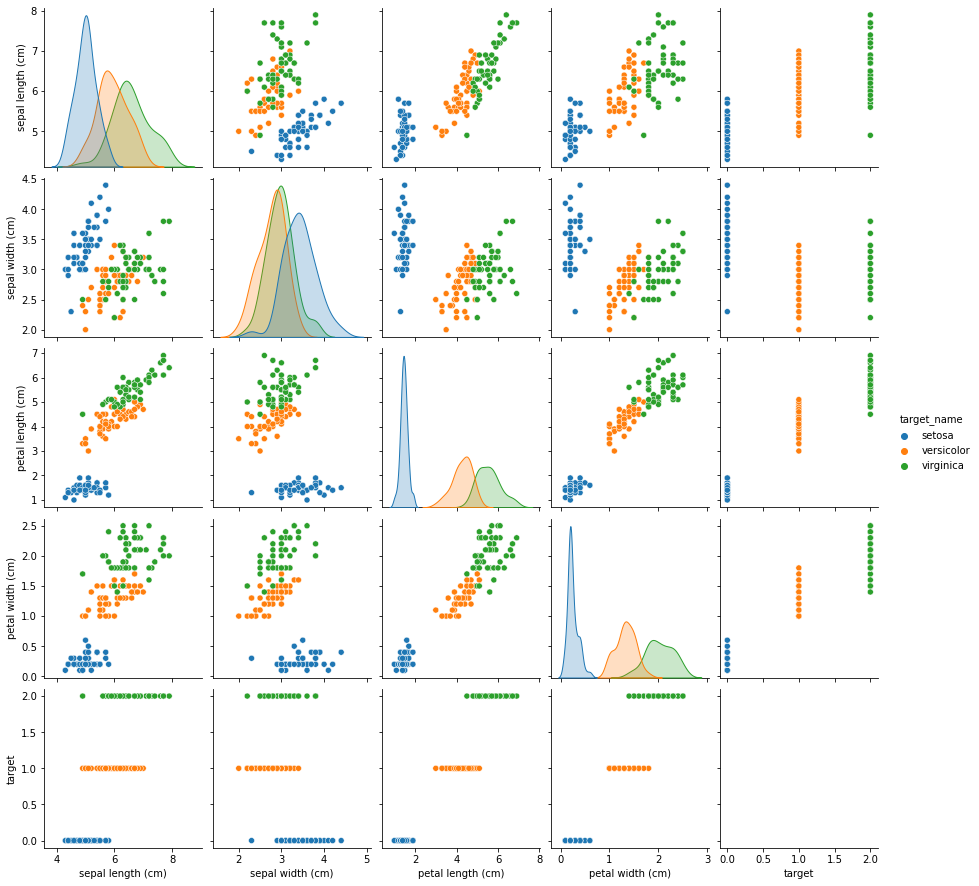

In [8]:
sns.pairplot(df,hue='target_name')

# Training 6 selected models

## Model 1 : Training Sepal length and Sepal width

Weight =  [0.44006346]
Bias =  0.07784852691881129


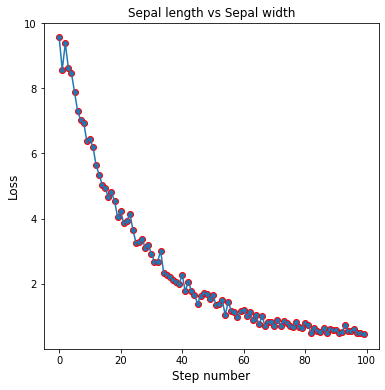

In [9]:
model1 = LinearRegression().fit(train_split[:, 0:1], train_split[:,1])
model1Title = "Sepal length vs Sepal width"
loss1 = model1.cost_list
stepList1 = model1.stepList
weight1 = model1.w
bias1 = model1.b
print("Weight = ", weight1)
print("Bias = ", bias1)
model1.plot_loss(loss1, stepList1,model1Title)

## Model 2 : Training Sepal length and Petal length

Weight =  [0.58093439]
Bias =  0.0894916756579683


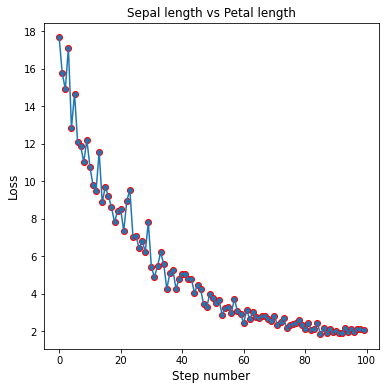

In [10]:
model2 = LinearRegression().fit(train_split[:, 0:1], train_split[:,2])
model2Title = "Sepal length vs Petal length"
loss2 = model2.cost_list
stepList2 = model2.stepList
weight2 = model2.w
bias2 = model2.b
print("Weight = ", weight2)
print("Bias = ", bias2)
model2.plot_loss(loss2, stepList2,model2Title)

## Model 3 : Training Sepal length and Petal width


Weight =  [0.18954409]
Bias =  0.028146568254044903


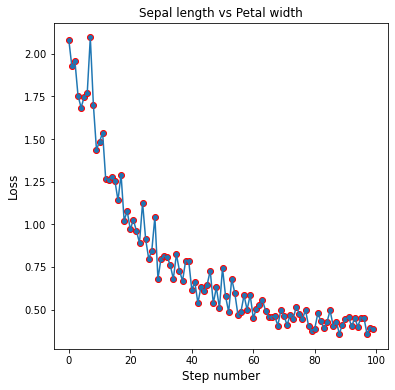

In [11]:
model3 = LinearRegression().fit(train_split[:, 0:1], train_split[:,3])
model3Title = "Sepal length vs Petal width"
loss3 = model3.cost_list
stepList3 = model3.stepList
weight3 = model3.w
bias3 = model3.b
print("Weight = ", weight3)
print("Bias = ", bias3)
model3.plot_loss(loss3, stepList3 ,model3Title)

## Model 4 : Training Petal length and Petal width


Weight =  [0.21423035]
Bias =  0.04243800785567844


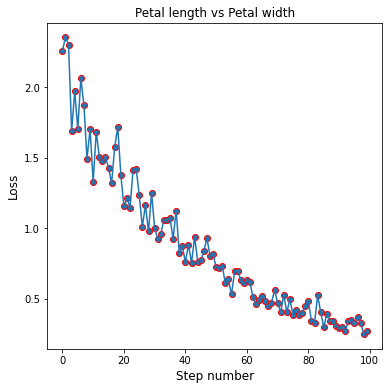

In [12]:
model4 = LinearRegression().fit(train_split[:, 2:3], train_split[:,3])
model4Title = "Petal length vs Petal width"
loss4 = model4.cost_list
stepList4 = model4.stepList
weight4 = model4.w
bias4 = model4.b
print("Weight = ", weight4)
print("Bias = ", bias4)
model4.plot_loss(loss4, stepList4 ,model4Title)

## Model 5 : Training Petal length and Sepal length


Weight =  [0.84803341]
Bias =  0.2281175580359571


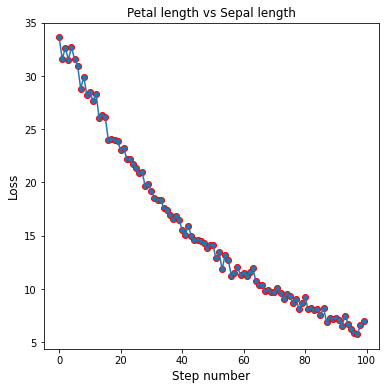

In [13]:
model5 = LinearRegression().fit(train_split[:, 2:3], train_split[:,0])
model5Title = "Petal length vs Sepal length"
loss5 = model5.cost_list
stepList5 = model5.stepList
weight5 = model5.w
bias5 = model5.b
print("Weight = ", weight5)
print("Bias = ", bias5)
model5.plot_loss(loss5, stepList5 ,model5Title)

## Model 6 : Training Petal length and Sepal width


Weight =  [0.4093178]
Bias =  0.12435441135240204


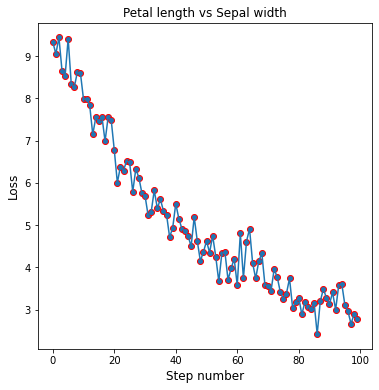

In [14]:
model6 = LinearRegression().fit(train_split[:, 2:3], train_split[:,1])
model6Title = "Petal length vs Sepal width"
loss6 = model6.cost_list
stepList6 = model6.stepList
weight6 = model6.w
bias6 = model6.b
print("Weight = ", weight6)
print("Bias = ", bias6)
model6.plot_loss(loss6, stepList6 ,model6Title)

# Testing the models

## Model 1 : Testing Sepal length and Sepal width

In [15]:
predict1 = model1.predict(test_split[:,0:1],weight1,bias1)
loss1 = model1.mean_sq(predict1, test_split[:,1])
print("MeanSquaredError = ",loss1)

MeanSquaredError =  0.5592094123824639


## Model 2 : Testing Sepal length and Petal length


In [16]:
predict2 = model2.predict(test_split[:,0:1],weight2,bias2)
loss2 = model2.mean_sq(predict2, test_split[:,2])
print("MeanSquaredError = ",loss2)

MeanSquaredError =  1.8630537228369597


## Model 3 : Testing Sepal length and Petal width


In [17]:
predict3 = model3.predict(test_split[:,0:1],weight3,bias3)
loss3 = model3.mean_sq(predict3, test_split[:,3])
print("MeanSquaredError = ",loss3)

MeanSquaredError =  0.40992566026243116


## Model 4 : Testing Petal length and Petal width


In [18]:
predict4 = model4.predict(test_split[:,2:3],weight4,bias4)
loss4 = model4.mean_sq(predict4, test_split[:,3])
print("MeanSquaredError = ",loss4)

MeanSquaredError =  0.25540060094853073


## Model 5 : Testing Petal length and Sepal length


In [19]:
predict5 = model5.predict(test_split[:,2:3],weight5,bias5)
loss5 = model5.mean_sq(predict5, test_split[:,0])
print("MeanSquaredError = ",loss5)

MeanSquaredError =  8.368353529308335


## Model 6 : Testing Petal length and Sepal width


In [20]:
predict6 = model6.predict(test_split[:,2:3],weight6,bias6)
loss6 = model6.mean_sq(predict6, test_split[:,1])
print("MeanSquaredError = ",loss6)

MeanSquaredError =  3.3894013590578256


### According to the test results  Petal length is most effective  in predicting Petal width with Mean Squared Error 0.257


# L2 Regularization for Petal length and Sepal length


In [21]:
model_without_regularization = LinearRegression().fit(train_split[:, (2,3)], train_y_split)
predicted_val = model_without_regularization.predict(test_split[:,(0,1)],model_without_regularization.w,model_without_regularization.b)
mse = model_without_regularization.mean_sq(predicted_val,test_y_split)
print("weights = {}".format(model_without_regularization.w))
print('loss without regularization -> {}'.format(mse))

weights = [0.18039303 0.06443645]
loss without regularization -> 0.6673862615957397


In [22]:
model_with_regularization = LinearRegression().fit(train_split[:, (2,3)], train_y_split, regularization=1)
predicted_val = model_with_regularization.predict(test_split[:,(0,1)],model_with_regularization.w,model_with_regularization.b)
mse = model_with_regularization.mean_sq(predicted_val,test_y_split)
print("weights = {}".format(model_with_regularization.w))
print('loss with regularization -> {}'.format(mse))

weights = [0.18205132 0.06549748]
loss with regularization -> 0.6805304441557449
